<a href="https://colab.research.google.com/github/Noahbisht0/Tensorflow2-keras/blob/main/Tensorflow2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-01-30 08:46:10--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   118MB/s    in 0.6s    

2021-01-30 08:46:11 (118 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os 
import zipfile 
local_zip = "/tmp/cats_and_dogs_filtered.zip"
zip = zipfile.ZipFile(local_zip,'r')
zip.extractall('/tmp')
zip.close()

In [ ]:
base_dir = "/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [ ]:
cat_fnames = os.listdir(train_cats_dir)
dog_fnames = os.listdir(train_dogs_dir)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
nrows = 4
ncols = 4


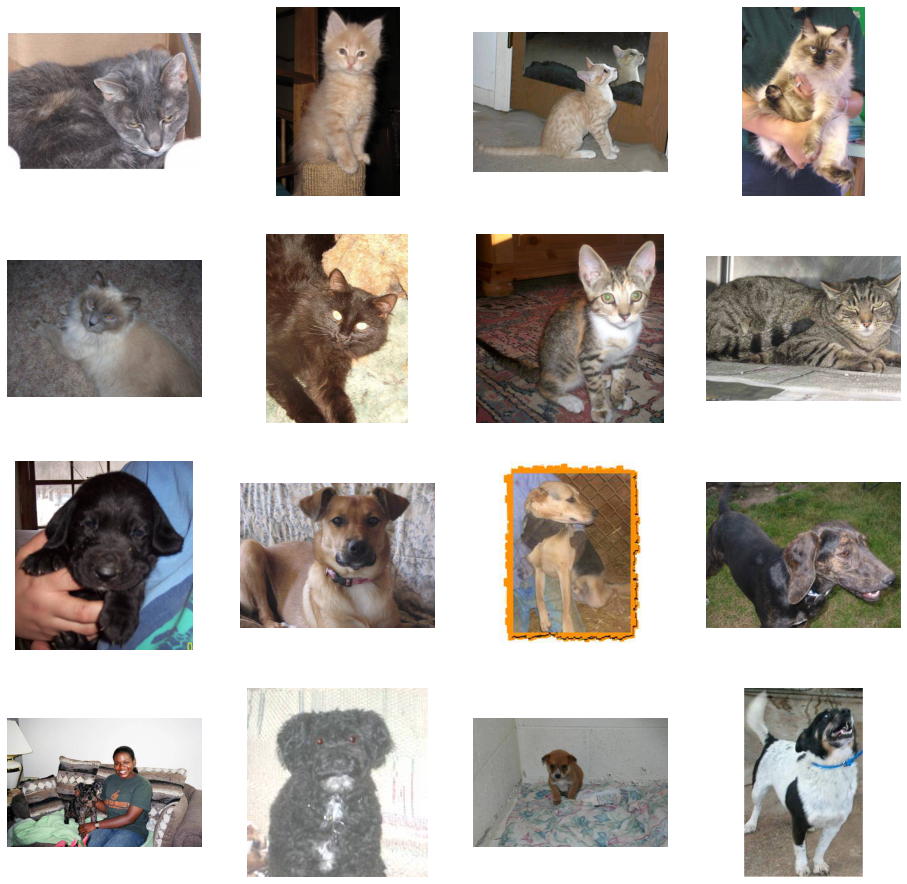

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4,ncols*4)
next_cat = [os.path.join(train_cats_dir,fname) for fname in cat_fnames[0:8]]
next_dog = [os.path.join(train_dogs_dir,fname) for fname in dog_fnames[0:8]]
for i,img_path in enumerate(next_cat+next_dog):
  plt.subplot(nrows,ncols,i+1)
  plt.axis('Off')
  image = img.imread(img_path)
  plt.imshow(image)
plt.show()  



In [ ]:
import tensorflow as tf 
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation="relu"),
                                    tf.keras.layers.Dense(1,activation="sigmoid")

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255) 
test_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode='binary',target_size=(150,150))
validation_generator = test_datagen.flow_from_directory(validation_dir,batch_size =20,class_mode='binary',target_size=(150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,validation_data=validation_generator,steps_per_epoch=100,epochs = 15,validation_steps=50,verbose=2)

Epoch 1/15
100/100 - 56s - loss: 0.7890 - accuracy: 0.5845 - val_loss: 0.6403 - val_accuracy: 0.6280
Epoch 2/15
100/100 - 55s - loss: 0.5957 - accuracy: 0.6860 - val_loss: 0.5683 - val_accuracy: 0.7300
Epoch 3/15
100/100 - 55s - loss: 0.5089 - accuracy: 0.7535 - val_loss: 0.5516 - val_accuracy: 0.7170
Epoch 4/15
100/100 - 55s - loss: 0.4190 - accuracy: 0.8050 - val_loss: 0.6263 - val_accuracy: 0.7280
Epoch 5/15
100/100 - 55s - loss: 0.3434 - accuracy: 0.8525 - val_loss: 0.6296 - val_accuracy: 0.7200
Epoch 6/15
100/100 - 55s - loss: 0.2593 - accuracy: 0.8855 - val_loss: 0.6725 - val_accuracy: 0.7350
Epoch 7/15
100/100 - 55s - loss: 0.1744 - accuracy: 0.9335 - val_loss: 0.8774 - val_accuracy: 0.7400
Epoch 8/15
100/100 - 55s - loss: 0.1233 - accuracy: 0.9530 - val_loss: 0.9668 - val_accuracy: 0.7330
Epoch 9/15
100/100 - 55s - loss: 0.0822 - accuracy: 0.9675 - val_loss: 1.0795 - val_accuracy: 0.7330
Epoch 10/15
100/100 - 55s - loss: 0.0987 - accuracy: 0.9690 - val_loss: 1.3117 - val_accura

In [ ]:
import numpy as np 
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  imag = image.load_img(path,target_size=(150,150))
  x = image.img_to_array(imag)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(classes[0])
  if classes[0] > 0:
    print(fn + "is a dog")
  else:
    print(fn + "is a cat")    


Saving cat.8.jpg to cat.8.jpg
[0.]
cat.8.jpgis a cat


Text(0.5, 1.0, 'Training and validation loss')

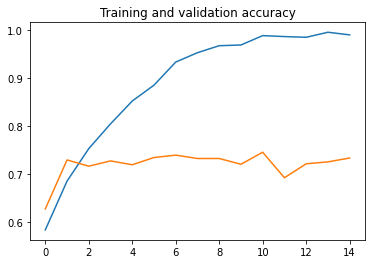

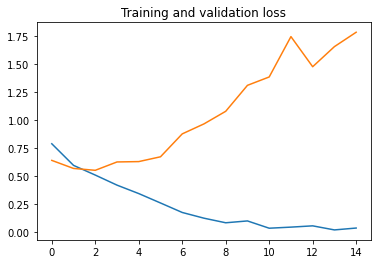

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title("Training and validation accuracy")
plt.figure()
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title("Training and validation loss")